# **Quantum Support Vector Machine**
###### ***Máquinas de Soporte Vectorial Cuántico***




## Introducción Machine Learning.

- Aprendizaje basados en una muestra de datos con el fin de tomar desciciones sin explícitamente programarlas.


##  



![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs42484-021-00056-8/MediaObjects/42484_2021_56_Fig2_HTML.png)

## Support Vector Machine

- Algoritmo clasificación binario.
- Dado un conjunto de características clasificar a que clase pertenece la observación.
- Los **Vectores Soporte** son clases representativas de nuestro conjunto de datos.
- SVM aprende sobre la **similitud de nuestros datos** para poder hacer la clasificación.
- El aprendizaje se resume en buscar el mejor hiperplano con el mejor margen.

![](Cats.png)

### Puntos de datos y la Naturaleza de su distribución

- Linealmente separables:
  - Es posible trazar una línea tal que me divida el conjutno de datos en dos categorías
  - SVM busca optimizar cual es la mejor línea de separación, maximizando separación de conjuntos.


![Linealmente](https://jeremykun.com/wp-content/uploads/2017/06/svm_solve_by_hand-e1496076457793.gif)



En la realidad con frecuencia es fácil encontrar la data como un problema **linealmente no-separable**, para manejar esto usaremos Kernels.

### Funciones Kernel

- Linealmente no-separables
  - Izquierda: No es posible trazar una líea que separe la data y conserve distribución
  - Derecha: 3D mayor grados de libertad.

- Kernels:
  - Funciones que nos facilitarán mapear la data a otra dimensión.

![Linealmente no-separables](https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png)


- Tipos de Kernel:

  - **Lineal**
  - **Gaussiano**
  - **Radial Basis Function**




- [Interactive SVM](https://greitemann.dev/svm-demo)


### Quantum Feature Map



- La idea es valerse del **computador cuántico a modo de función Kernel** para las máquinas de vector soporte.

- Dado un conjunto de datos $X$ que será el input. Un **feature map** $\phi$ es una función que $\phi : X \rightarrow F$ este es el espacio de características.

- El output del mapeo anterior toma los datapoints individuales $\phi(x)$ para $x \epsilon X$

- Espacio inicial es de **n-features**, la idea es codificar cada atributo en un qubit distinto. Sin embargo **n-qubits** se puede representar en un espacio de $2^n$

$$ n \rightarrow 2^n$$

# Implementación QSVM

###### ***QML con PennyLane***
###### ***PennyLane Version 0.19.0***



In [105]:
#Quantum dependencies
import pennylane as qml
from pennylane import numpy as np


In [106]:
# Clasical Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
from sklearn.metrics import accuracy_score
from sklearn import svm 

In [107]:
sns.set_theme()

### Ad-hoc data

- Debido a que nuestros modelos de Machine learnign suelen recibir data preprocesada en arreglos de numpy que representarán nuestros tensores como inputs, la data **ad-hoc** tiene el propósito de tener una distribución aleatoria.

- Teniendo en cuenta que es una data Ad-Hoc, no precisamos usar el conjunto de datos de validación, con el que verdaderamente probaríamos la efectividad de nuestro modelo.

In [108]:
n_samples = 30 * 4
A = np.array([[np.random.normal(loc=0), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
B = np.array([[np.random.normal(loc=2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 
C = np.array([[np.random.normal(loc=2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
D = np.array([[np.random.normal(loc=-2), np.random.normal(loc=-2)] for i in range(n_samples//4)])


In [109]:
# Inside our array
A[:5]

tensor([[ 2.88009666e-03,  1.91853264e+00],
        [ 6.83633830e-02,  2.71078769e+00],
        [ 4.87444024e-01,  3.22677588e+00],
        [-4.18407732e-02,  2.22827036e+00],
        [-5.14959223e-01,  1.57531895e+00]], requires_grad=True)

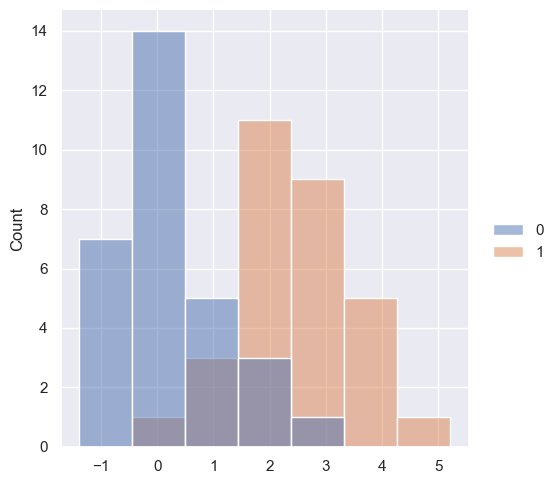

In [110]:
sns.displot(A)

In [111]:
# Inside our Tensor of arrays A,B, C, D
feature = np.concatenate([A, B,C,D], axis=0)/4
feature[:5] 

tensor([[ 7.20024166e-04,  4.79633161e-01],
        [ 1.70908458e-02,  6.77696923e-01],
        [ 1.21861006e-01,  8.06693970e-01],
        [-1.04601933e-02,  5.57067591e-01],
        [-1.28739806e-01,  3.93829736e-01]], requires_grad=True)

En las máquinas de soporte vectorial necesitamos separar nuestras muestras con un plano, y los valores que le daremos a la nueva clasificación serán de $y=\{-1,1\}$ , donde es una u otra clase. Las etiquetas a continuación sirven para tal propósito.

In [112]:
# Our label to work on
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
label[40:90]

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], requires_grad=True)

In [113]:
# Final AD Hoc Data
data = list(zip(feature, label))
data[:5]

[(tensor([0.00072002, 0.47963316], requires_grad=True),
  tensor(-1., requires_grad=True)),
 (tensor([0.01709085, 0.67769692], requires_grad=True),
  tensor(-1., requires_grad=True)),
 (tensor([0.12186101, 0.80669397], requires_grad=True),
  tensor(-1., requires_grad=True)),
 (tensor([-0.01046019,  0.55706759], requires_grad=True),
  tensor(-1., requires_grad=True)),
 (tensor([-0.12873981,  0.39382974], requires_grad=True),
  tensor(-1., requires_grad=True))]

120


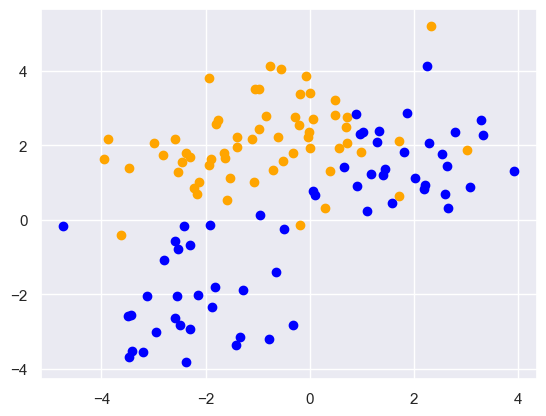

In [114]:
np.random.shuffle(data) # Randomize data
print(len(data))
plt.scatter(A[:,0], A[:,1], color = "orange")
plt.scatter(B[:,1], B[:,0], color = "orange")
plt.scatter(C[:,0], C[:,1], color = "blue")
plt.scatter(D[:,1], D[:,0], color = "blue")
plt.show()

### Spliting Data

En esta sección realizaremos el tratamiento clásico para dividir la data que tenemos en entrenamiento y test, con el que le enseñaremos a nuestro algoritmo y con el que probaremos inicialmente su predicción.

In [115]:
porcentaje_train = 0.5
m = int(porcentaje_train * n_samples) # Limit for samples


# Training Data
x_train = np.array([data[i][0] for i in range(m)])
y_train = np.array([data[i][1] for i in range(m)])

# Test Data
x_test = np.array([data[i][0] for i in range(m,n_samples)])
y_test = np.array([data[i][1] for i in range(m,n_samples)])



In [116]:
x_train[:5]

tensor([[ 0.76899793,  0.21871764],
        [ 0.17590428,  0.68793284],
        [ 0.17599928,  0.51265231],
        [ 0.17562518,  0.6255918 ],
        [-0.07046413,  0.6878692 ]], requires_grad=True)

In [117]:
# Length of the array
n = len(x_train[0])
n

2

### Computando SVM y Quantum Kernel

Parte del proceso matemático que sigue las máquinas de soporte vectorial involucra buscar los $\vec{\alpha}$ que minimicen la función de pérdida **L**:

$$L = -\sum_{i=0}^{m}\alpha_{i} + \frac{1}{2} \sum_{i=0}^{m} \sum_{j=0}^{m} \alpha_{i} \alpha_{j} f(\vec{x_{i}}) f(\vec{x_{j}}) \vec{x_{i}} \cdot \vec{x_{j}}$$

Donde:
- $\vec{x_i}$ hace referencia a las características del i-ésimo dato punto, un vector de características.
- $f(\vec{x_i})$ a su etiqueta correspondiente.

Una vez minimizada la función $L$ a partir de $\vec{\alpha}$ se puede conseguir el hiperplano de clasificación, aquí se vuelve de interés, solo tenemos que cambiar un poco la función introduciendo $\vec{\phi}$ que será la función que mapeará de un plano a otro, así es que introduciremos el kernel.

![](https://cdn-images-1.medium.com/max/800/1*qYg3y4_Qaj00U7sMU_XlaQ.gif)


Tan solo hay que cambiar la función de pérdida a minimizar donde el producto de los inputs $\vec{x_{i}} \cdot \vec{x_{j}}$  es cobijado por nuestra nueva función $\phi$ la cual mapeará cada input:

$$L = -\sum_{i=0}^{m}\alpha_{i} + \frac{1}{2} \sum_{i=0}^{m} \sum_{j=0}^{m} \alpha_{i} \alpha_{j} f(\vec{x_{i}}) f(\vec{x_{j}}) \phi(\vec{x_{i}}) \cdot \phi(\vec{x_{j}})$$

Por tanto, lo que haremos será calcular todos lo productos internos a traves del nuestra función de mapeo, es decir, la matriz de Gramm estará  esta compuesta de estos productos; calcularemos los productos internos $\phi(\vec{x_{i}}) \cdot \phi(\vec{x_{j}})$


De esto tenemos que ocurre lo siguiente, conocido que $U$ es una operación unitaria:



$$\phi(\vec{x_{i}}) = U(\vec{x_{i}})\ket{00}$$

La expresión anterior puede ser contener un número imaginario y podríamos calcular el modulo al cuadrado de la expresión quedarnos con la parte real:

$$|\phi(\vec{x_{i}})|^2 = \bra{00}U(\vec{x_{i}})^tU(\vec{x_{i}})\ket{00}$$


#### Matriz de Gram.

Es la matriz que almacena los productos internos de $\phi(\vec{x_{i}}) \cdot \phi(\vec{x_{j}})$. Esta se ve así, para cada producto de los vectores.

$$\begin{pmatrix}\phi(\vec{x_{0}}) \cdot \phi(\vec{x_{0}})&...&...\\&...&...\\&...&...\\&...&...\\&...&\phi(\vec{x_{n}}) \cdot \phi(\vec{x_{m}})\end{pmatrix}$$

Esto es lo que le introducimos como dato al SVM para pueda minimzar la función. Es decir nuestro **Kernel computado cuánticamente**


**Nota**:Existe una forma más práctica acceder actualmente a estos quantum feature maps, y también diferentes formas de realizarse, diferente al encodign hecho a partir de la base, también se peude hacer usando las amplitudes.

- [Quantum Embedding Templates](https://docs.pennylane.ai/en/stable/introduction/templates.html)




#### Circuito QSVM

![](https://miro.medium.com/max/1120/1*oYxRrkgiO4qYrAiGYroo-A.png)

In [118]:
@qml.template
def feature_map(x):
    
    # ZZMap modificado
    for i in range(2):
        qml.Hadamard(wires = i)

    # U
    qml.RZ(2*x[0], wires = 0)
    qml.RZ(2*x[1], wires = 1) # Encode in Phase
    qml.CNOT(wires = [0,1])
    qml.RZ(2*(np.pi - x[0])*(np.pi - x[1]), wires = 1)
    qml.CNOT(wires = [0,1])
    

Aqui podemos construir circuitio con $U^t(\vec{x_{i}})U(\vec{x_{j}})$ y aplicarlo sobre el $\ket{00}$

In [119]:
dev = qml.device("default.qubit", wires = n)      
@qml.qnode(dev)
def circuit(x,y):
    feature_map(y)
    qml.adjoint(feature_map)(x) # U**t
    return qml.probs(wires = range(n))


Es la probabilidad de observar el 0, como producto escalar.

In [120]:
# devuelve el valor final del producto interno
def scalar_product(x,y):
    probs = circuit(x,y)
    return probs[0]

Calcularemos la matriz Gramm y sus productos internos

In [121]:
# Esto es básicament elo que se mete en el Kernel
def KernelGramMatrixFull(X1, X2):
    print("Calculando matriz de Gram")
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            
            x1 = x1.flatten()
            x2 = x2.flatten()
            
            gram_matrix[i, j] = scalar_product(x1,x2)
            
    return gram_matrix

Entrenamos el SVM, usando sklearn para poder aprovecharnos de las funciones de minimización.

### Entrenando Modelo Clásico y Cuántico

In [122]:
clf_linear = svm.SVC(kernel="linear")
clf_linear.fit(x_train, y_train)
print("Entrenando...")

Entrenando...


In [123]:
clf = svm.SVC(kernel="precomputed")
matrix = KernelGramMatrixFull(x_train,x_train)
print("Entrenando...")
clf.fit(matrix, y_train)

Calculando matriz de Gram


C:\Users\jefai\AppData\Local\Temp\ipykernel_5224\3196985145.py:4: UserWarning: The template decorator is deprecated and will be removed in release v0.20.0
  feature_map(y)
c:\Users\jefai\Documents\Cerebrum\Learning_Notebooks\NoteBooks\Computación Cuántica\env_q\lib\site-packages\pennylane\transforms\adjoint.py:115: UserWarning: The template decorator is deprecated and will be removed in release v0.20.0
  fn(*args, **kwargs)


Entrenando...


SVC(kernel='precomputed')

### Predicciones Clásicas y Cuánticas

In [124]:
print("Comprobando con test...")
sol = clf_linear.predict((x_test))
success = 0
for i in range(len(y_test)):
    if sol[i] == y_test[i]:
        success += 1
        
print("Precisión del test Kernel Lineal: ", success/len(sol)*100, "%")

Comprobando con test...
Precisión del test Kernel Lineal:  63.33333333333333 %


In [125]:
print("Comprobando con test...")
sol = clf.predict(KernelGramMatrixFull(x_test,x_train))
success = 0
for i in range(len(y_test)):
    if sol[i] == y_test[i]:
        success += 1
        
print("Precisión del test Kernel Cuántico: ", success/len(sol)*100, "%")

Comprobando con test...
Calculando matriz de Gram


C:\Users\jefai\AppData\Local\Temp\ipykernel_5224\3196985145.py:4: UserWarning: The template decorator is deprecated and will be removed in release v0.20.0
  feature_map(y)
c:\Users\jefai\Documents\Cerebrum\Learning_Notebooks\NoteBooks\Computación Cuántica\env_q\lib\site-packages\pennylane\transforms\adjoint.py:115: UserWarning: The template decorator is deprecated and will be removed in release v0.20.0
  fn(*args, **kwargs)


Precisión del test Kernel Cuántico:  85.0 %


### Predicción

- Constraste sobre predicción.
- Puntos Rojos no predichos.
- Precisión del test **Kernel Clásico**:   63.3 %
- Precisión del test **Kernel Cuántico**:  85.0 %

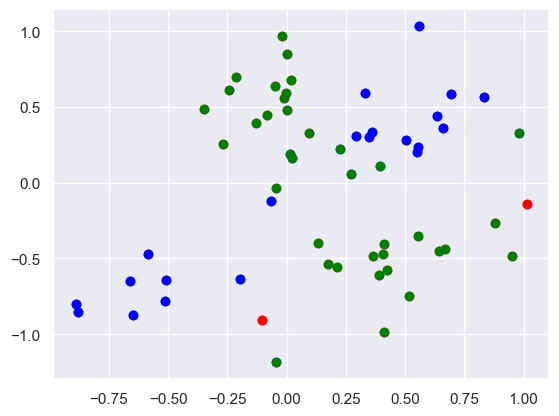

In [126]:
# Draw Scatter
for i in range(len(x_test)):
    color ="blue"
    if y_test[i] ==-1:
        color="red"
    plt.scatter(x_test[i,0], x_test[i,1], color=color)

    if sol[i] ==-1:
        color="green"
    plt.scatter(x_test[i,0], x_test[i,1], color=color)

plt.show()

##